# Capstone Webscrapping using BeautifulSoup

### Penyelesaian project oleh *MULATUA HASIHOLAN


## Background

Menggunanakan sumber data film yang rilis di tahun 2021 pada URL berikut: `https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31`

Saya akan melakukan dua objektif sebagai berikut:

    * Mengambil data judul, imdb rating , metascore, dan votes
    * Membuat plot dari 7 film paling populer di tahun 2021.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div', attrs={'class': 'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt7144666">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt7144666/">
    <img alt="The Black Phone" class="loadlate" data-tconst="tt7144666" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BOWVmNTBiYTUtZWQ3Yi00ZDlhLTgyYjUtNzBhZjM3YjRiNGRkXkEyXkFqcGdeQXVyNzYyOTM1ODI@._V1_UX67_CR0,0,6


#### Melakukan pendalaman terhadap sumber data untuk mencari kata kunci yang akan digunakan untuk scrap data nantinya

In [5]:
#Mendalami sumber data untuk mencari kunci yang tepat (secara jumlah)
drill_down = table.find_all('div', attrs={'class':'lister-item mode-advanced'})
row_length = len(drill_down)
row_length

50

In [6]:
#Mendalami sumber data untuk mencari kunci yang tepat (kata kunci)
drill_down[0]

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt7144666"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt7144666/"> <img alt="The Black Phone" class="loadlate" data-tconst="tt7144666" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BOWVmNTBiYTUtZWQ3Yi00ZDlhLTgyYjUtNzBhZjM3YjRiNGRkXkEyXkFqcGdeQXVyNzYyOTM1ODI@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt7144666/">The Black Phone</a>
<span class="lister-item-year text-muted unbold">(2021)</span>
</h3>
<p class="text-muted">
<span class="certificate">17+</span>
<span class="ghost">|</span>
<span class="runtime">103 min</span>
<span class="ghost">|</span>
<span class="genre">
Horror, Thriller    

#### Dilanjutkan dengan melakukan penggunaan kata kunci terhadap sumber data untuk mmenarik data sesuai dengan variabel-variabel yang dibutuhkan

### Variabel Judul

In [7]:
#Cek jumlah output untuk Judul dan Tahun
title_year = table.find_all('h3', attrs={'class':'lister-item-header'})
row_length = len(title_year)
row_length

50

In [8]:
#Cek isi output untuk Judul dan Tahun
title_year[0]

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt7144666/">The Black Phone</a>
<span class="lister-item-year text-muted unbold">(2021)</span>
</h3>

In [9]:
#Cek output untuk Judul dan Tahun dalam bentuk teks
title_year = table.find_all('h3', attrs={'class':'lister-item-header'})[0].text
title_year

'\n1.\nThe Black Phone\n(2021)\n'

### Variabel Ratings

In [10]:
#Cek output untuk ratings dalam bentuk teks
ratings = table.find_all('strong')[0].text
ratings

'7.3'

In [11]:
#Cek jumlah output untuk rating
ratings = table.find_all('strong')
row_length_ratings = len(ratings)
row_length_ratings

50

### Variabel Metascore

In [12]:
#Cek output untuk metascore dalam bentuk teks
metascore = table.find_all('span', attrs={'class':('metascore favorable', 'metascore mixed', 'metascore unfavorable')})[0].text
metascore

'65        '

In [13]:
#Cek jumlah output untuk metascore
metascore = table.find_all('span', attrs={'class':('metascore favorable', 'metascore mixed', 'metascore unfavorable')})
row_length_metascore = len(metascore)
row_length_metascore

32

### Variabel Votes

In [14]:
#Cek output untuk votes dalam bentuk teks
votes = table.find_all('p', attrs={'class': 'sort-num_votes-visible'})[0].text
votes

'\nVotes:\n23,638\n'

In [15]:
#Cek jumlah output untuk rating
votes = table.find_all('p', attrs={'class': 'sort-num_votes-visible'})
row_length_votes = len(votes)
row_length_votes

50

#### Setelah seluruh varibel sudah dipastikan dapat ditarik datanya, dilakukan pengumpulan dan penarikan data untuk variabel judul, rating, dan votes terlebih dahulu:

In [16]:
#Mengambil data Judul, Ratings, Votes
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get data
    title_year = table.find_all('h3', attrs={'class':'lister-item-header'})[i].text
    title = title_year.split("\n")
    
    ratings = table.find_all('strong')[i].text
    
    votes = table.find_all('p', attrs={'class': 'sort-num_votes-visible'})[i].text
    votes = votes.lstrip('\nVotes:\n').lstrip('\n').split("\n")

    temp.append((title[2], ratings, votes[0]))
    
temp

[('The Black Phone', '7.3', '23,638'),
 ('Only Murders in the Building', '8.1', '73,466'),
 ('Sing 2', '7.4', '55,513'),
 ('Spider-Man: No Way Home', '8.3', '672,785'),
 ('1883', '8.8', '56,031'),
 ('No Time to Die', '7.3', '372,829'),
 ('Superman & Lois', '7.8', '30,538'),
 ('Last Night in Soho', '7.1', '113,025'),
 ('Hacks', '8.2', '25,151'),
 ('Dune: Part One', '8.0', '587,813'),
 ('Ghostbusters: Afterlife', '7.1', '161,888'),
 ('Mad God', '6.8', '4,639'),
 ('The Book of Boba Fett', '7.3', '133,763'),
 ("You Don't Know Me", '6.8', '3,916'),
 ('WandaVision', '7.9', '301,220'),
 ('Pleasure', '6.3', '12,167'),
 ('Old', '5.8', '109,318'),
 ('Eternals', '6.3', '318,232'),
 ('Invincible', '8.7', '121,073'),
 ('House of Gucci', '6.6', '110,717'),
 ('Resident Evil: Welcome to Raccoon City', '5.2', '46,919'),
 ('Licorice Pizza', '7.3', '88,999'),
 ('Ojing-eo geim', '8.0', '424,858'),
 ('Verdens verste menneske', '7.9', '50,606'),
 ('Free Guy', '7.1', '348,746'),
 ('Encanto', '7.2', '205,295'

#### Penarikan data kemudian dilanjutkan untuk variabel Metascore. Dilakukan tepisah karena untuk data ini ada perbedaan dari jumlah datanya sehingga tidak bisa dilakukan sekaligus dengan variabel-variabel sebelumnya

In [17]:
#Mengambil data Metascore
temp_2 = [] #initiating a tuple

for i in range(0, row_length_metascore):

    #get data
    metascore = table.find_all('span', attrs={'class':('metascore favorable', 'metascore mixed', 'metascore unfavorable')})[i].text
    
    temp_2.append(metascore[:2])

## Creating data frame & Data wrangling

####  variabel judul, rating, dan votes disusun ke dalam dataframe, dilanjutkan dengan manipulasi data untuk variabel metascore

In [18]:
import pandas as pd

imdb_data = pd.DataFrame(temp, columns = ('Title', 'Ratings', 'Votes'))
imdb_data

,Title,Ratings,Votes
0,The Black Phone,7.3,"23,638"
1,Only Murders in the Building,8.1,"73,466"
2,Sing 2,7.4,"55,513"
3,Spider-Man: No Way Home,8.3,"672,785"
4,1883,8.8,"56,031"
5,No Time to Die,7.3,"372,829"
6,Superman & Lois,7.8,"30,538"
7,Last Night in Soho,7.1,"113,025"
8,Hacks,8.2,"25,151"
9,Dune: Part One,8.0,"587,813"


In [19]:
#manipulasi data film yang tidak memiliki data Metascore
metascore = pd.DataFrame(temp_2)
metascore.loc[0.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[3.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[5.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[7.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[11.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[12.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[13.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[17.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[21.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[25.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[26.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[27.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[35.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[36.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[41.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[42.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[44.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.loc[45.5] = 0
metascore = metascore.sort_index().reset_index(drop = True)
metascore.tail()

,0
45,0
46,0
47,37
48,57
49,49


#### Setelah seluruh varibel membentuk dataframe, seluruh data digabungkan kedalam satu dataframe yang sama

In [20]:
#menggabungkan data Metscore ke imdb_data
imdb_data['Metascore'] = metascore
imdb_data

,Title,Ratings,Votes,Metascore
0,The Black Phone,7.3,"23,638",65
1,Only Murders in the Building,8.1,"73,466",0
2,Sing 2,7.4,"55,513",49
3,Spider-Man: No Way Home,8.3,"672,785",71
4,1883,8.8,"56,031",0
5,No Time to Die,7.3,"372,829",68
6,Superman & Lois,7.8,"30,538",0
7,Last Night in Soho,7.1,"113,025",65
8,Hacks,8.2,"25,151",0
9,Dune: Part One,8.0,"587,813",74


#### Dataframe akhir kemudian dirapikan dari sisi jenis data agar dapat dilakukan visualisasi

In [21]:
#Menghilangkan tanda koma pada data Votes
imdb_data['Votes'] = imdb_data['Votes'].str.replace(',','')
imdb_data.head()

,Title,Ratings,Votes,Metascore
0,The Black Phone,7.3,23638,65
1,Only Murders in the Building,8.1,73466,0
2,Sing 2,7.4,55513,49
3,Spider-Man: No Way Home,8.3,672785,71
4,1883,8.8,56031,0


In [22]:
#Sebelum membuat visualisasi dilakukan pengecekan jenis data
imdb_data.dtypes

Title        object
Ratings      object
Votes        object
Metascore    object
dtype: object

In [23]:
#Beberapa data yang perlu diubah adalah Ratings, Votes, dan Metascore.
imdb_data['Ratings'] = imdb_data['Ratings'].astype('float64')
imdb_data['Votes'] = imdb_data['Votes'].astype('int64')
imdb_data['Metascore'] = imdb_data['Metascore'].astype('int64')
imdb_data.dtypes

Title         object
Ratings      float64
Votes          int64
Metascore      int64
dtype: object

In [24]:
#menjadikan kolom Title sebagai index
imdb_data = imdb_data.set_index('Title')
imdb_data.head()

,Ratings,Votes,Metascore
Title,,,
The Black Phone,7.3,23638,65
Only Murders in the Building,8.1,73466,0
Sing 2,7.4,55513,49
Spider-Man: No Way Home,8.3,672785,71
1883,8.8,56031,0


## Analysis and Conclusion

Pada data yang diambil ada 3 variabel yang dapat digunakan sebagai ukuran popularitas, yakni: Ratings, Votes dan Metascore. Untuk masing-masing variabel dibuat visualisasinya berdasarkan 7 film dengan nilai tertinggi pada masing-masing variabel ukuran yang telah disebutkan sebelumnya.

<AxesSubplot:xlabel='Title'>

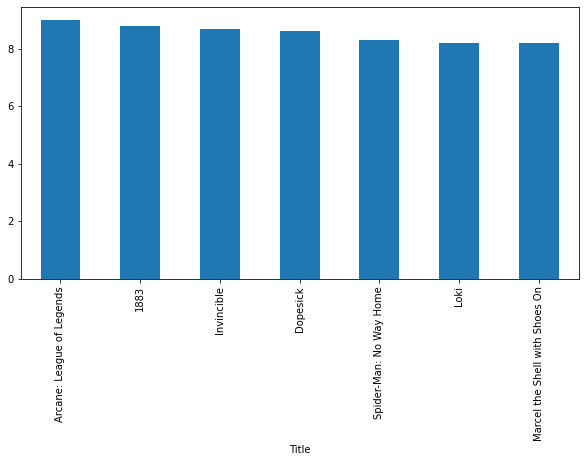

In [25]:
#7 film paling populer di tahun 2021 berdasarkan Ratings
imdb_data.sort_values('Ratings', ascending=False)['Ratings'].head(7).plot.bar(figsize=(10, 5))

<AxesSubplot:xlabel='Title'>

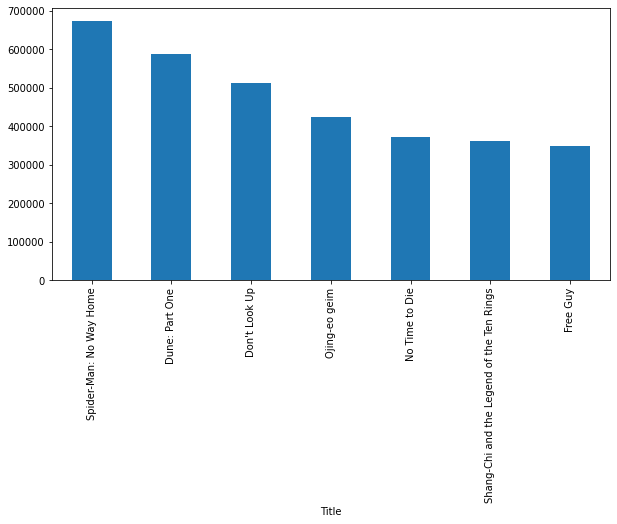

In [26]:
#7 film paling populer di tahun 2021 berdasarkan Votes
imdb_data.sort_values('Votes', ascending=False)['Votes'].head(7).plot.bar(figsize=(10, 5))

<AxesSubplot:xlabel='Title'>

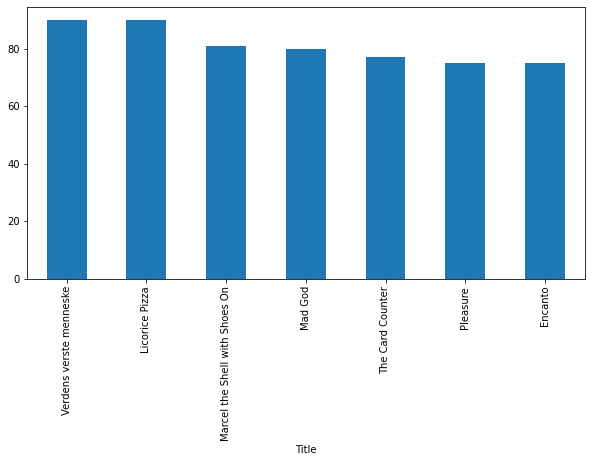

In [27]:
#7 film paling populer di tahun 2021 berdasarkan Metascore
imdb_data.sort_values('Metascore', ascending=False)['Metascore'].head(7).plot.bar(figsize=(10, 5))

### Kesimpulan

Ketiga variabel Metascore, Ratings, dan Votes dapat menjadi ukuran dari popularitas bergantung kepada perspektif apa yang ingin dilihat terkait kata popularitas itu sendiri.

Pengertian Metascore adalah angka yang dihasilkan dari review atau kritik yang diterima oleh sebuah film. Dari angka ini dapat juga disimpulakan sentimen atau daya tarik sebuah film yang nantinya akan mendukung tingkat popularitasnya. Sehingga film yang tinggi secara angka metascore itu menunjukkan popularitas sentimen namun menurut user atau kritikus.

Pengertian Ratings adalah angka yang diberikan oleh IMDB berdasarkan faktor-faktor ukurannya, yang salah satunya adalah ukuran banyaknya penonton. Dari angka ini juga dapat disimpulkan film yang paling berhasil termasuk untuk sisi popularitasnya adalah film dengan Rating yang tinggi.

Pengertian untuk Votes adalahbanyaknya orang yang berkontribusi dalam memberikan penilaian. Dari angka ini juga bisa disimpulkan, semakin tinggi nilai votenya maka semakin banyak orang yang mngenal film tersebut sehingga mau mberikan suaranya.